In [1]:
from bs4 import BeautifulSoup as BS
import urllib.request
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
% matplotlib inline
import seaborn as sns

import geopandas as gpd
from shapely.geometry import Point

import datetime

In [2]:
request = urllib.request.Request("https://en.wikipedia.org/wiki/List_of_deadly_earthquakes_since_1900")
result = urllib.request.urlopen(request)
resulttext = result.read()
soup = BS(resulttext, 'html.parser')
type(soup)

bs4.BeautifulSoup

In [3]:
table = soup.find_all('table', class_="sortable wikitable")
#table
type(table)
#len(table)

bs4.element.ResultSet

In [4]:
table_2 = table[0]
type(table_2)

bs4.element.Tag

In [5]:
table_headers = table_2.find_all("th")

In [6]:
type(table_headers)

bs4.element.ResultSet

In [7]:
columns = [th.text for th in table_headers]

In [8]:
type(columns)

list

In [9]:
rows = []
for tr in table_2.find_all("tr")[1:]:
    row_data = [td.text for td in tr.find_all("td")]
    rows.append(row_data)

In [10]:
rows

[['1900-05-11 17:23',
  'Japan',
  '38.700',
  '141.100',
  '5',
  '7.0 MJMA',
  '',
  '',
  '',
  '',
  '',
  ''],
 ['1900-07-12 06:25',
  'Turkey',
  '40.300',
  '43.100',
  '',
  '5.9 Muk',
  '',
  '',
  '',
  '140',
  '',
  ''],
 ['1900-10-29 09:11',
  'Venezuela',
  '11.000',
  '-66.000',
  '0',
  '7.7 Mw',
  '',
  '',
  '',
  '',
  '',
  ''],
 ['1901-02-15 00:00',
  'China',
  '26.000',
  '100.100',
  '0',
  '6.5 Ms',
  '',
  '',
  '',
  '',
  '',
  ''],
 ['1901-03-31 07:11',
  'Bulgaria',
  '43.400',
  '28.700',
  '',
  '6.4 Muk',
  '',
  '',
  '',
  '4',
  '',
  ''],
 ['1901-08-09 09:23',
  'Japan',
  '40.500',
  '142.500',
  '35',
  '7.2 Mw',
  'T',
  '',
  '',
  '',
  '',
  ''],
 ['1901-11-15 20:15',
  'New Zealand (see 1901 Cheviot earthquake)',
  '-43.000',
  '173.000',
  '0',
  '6.8 Ms',
  '',
  '',
  '',
  '1',
  '',
  ''],
 ['1902-01-30 14:01',
  'Japan',
  '40.500',
  '141.300',
  '35',
  '6.9 Ms',
  '',
  '',
  '',
  '1',
  '',
  ''],
 ['1902-02-13 09:39',
  'Azerbaija

In [11]:
earthquakes = pd.DataFrame(rows, columns = columns)
earthquakes = earthquakes.replace("", np.nan)

In [12]:
earthquakes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1340 entries, 0 to 1339
Data columns (total 12 columns):
Origin (UTC)                                         1340 non-null object
Present-day country and link to Wikipedia article    1340 non-null object
Lat                                                  1326 non-null object
Long                                                 1326 non-null object
Depth (km)                                           1250 non-null object
Magnitude                                            1339 non-null object
Secondary Effects                                    373 non-null object
PDE Shaking Deaths                                   739 non-null object
PDE Total Deaths                                     750 non-null object
Utsu Total Deaths                                    1027 non-null object
EM-DAT Total Deaths                                  560 non-null object
Other Source Deaths                                  37 non-null object
dtypes: obj

In [13]:
earthquakes["Other Source Deaths"].value_counts()

1                                      3
26271[11] 26000[12]                    1
46                                     1
231000*[13] 283000*[14] 227898*[15]    1
181                                    1
2041                                   1
42                                     1
601 (as of October 30, 2011)           1
380                                    1
521[19]                                1
200                                    1
34                                     1
2,698                                  1
1404                                   1
111+                                   1
1500[6]                                1
15894[20]                              1
189                                    1
68                                     1
120                                    1
150+                                   1
2489[10]                               1
105000                                 1
295                                    1
41              

In [14]:
test = "(\[\d+\]|\(.*\)|\*|\+|\,)"

In [15]:
earthquakes["Other Source Deaths"] = earthquakes["Other Source Deaths"].str.replace(test, "")
#footnotes = earthquakes["Other Source Deaths"].str.extract("(?P<footnotes>\[\d+\]|\(.*\)|\*|\+)", expand = False)
#earthquakes["footnotes"] = footnotes.
#footnotes.unique()
earthquakes
#clean up lat long columns. some NaN values.

,Origin (UTC),Present-day country and link to Wikipedia article,Lat,Long,Depth (km),Magnitude,Secondary Effects,PDE Shaking Deaths,PDE Total Deaths,Utsu Total Deaths,EM-DAT Total Deaths,Other Source Deaths
0,1900-05-11 17:23,Japan,38.700,141.100,5,7.0 MJMA,NaN,NaN,NaN,NaN,NaN,NaN
1,1900-07-12 06:25,Turkey,40.300,43.100,NaN,5.9 Muk,NaN,NaN,NaN,140,NaN,NaN
2,1900-10-29 09:11,Venezuela,11.000,-66.000,0,7.7 Mw,NaN,NaN,NaN,NaN,NaN,NaN
3,1901-02-15 00:00,China,26.000,100.100,0,6.5 Ms,NaN,NaN,NaN,NaN,NaN,NaN
4,1901-03-31 07:11,Bulgaria,43.400,28.700,NaN,6.4 Muk,NaN,NaN,NaN,4,NaN,NaN
5,1901-08-09 09:23,Japan,40.500,142.500,35,7.2 Mw,T,NaN,NaN,NaN,NaN,NaN
6,1901-11-15 20:15,New Zealand (see 1901 Cheviot earthquake),-43.000,173.000,0,6.8 Ms,NaN,NaN,NaN,1,NaN,NaN
7,1902-01-30 14:01,Japan,40.500,141.300,35,6.9 Ms,NaN,NaN,NaN,1,NaN,NaN
8,1902-02-13 09:39,Azerbaijan,40.700,48.600,15,6.9 Muk,NaN,NaN,NaN,86,NaN,NaN
9,1902-03-09 07:46,Turkey,40.700,33.600,NaN,5.5 Muk,NaN,NaN,NaN,4,NaN,NaN


In [16]:
earthquakes[earthquakes["Lat"].isnull()]

,Origin (UTC),Present-day country and link to Wikipedia article,Lat,Long,Depth (km),Magnitude,Secondary Effects,PDE Shaking Deaths,PDE Total Deaths,Utsu Total Deaths,EM-DAT Total Deaths,Other Source Deaths
439,1966-04-25 23:22,Uzbekistan (see 1966 Tashkent earthquake),NaN,NaN,NaN,5 ML,NaN,NaN,NaN,NaN,10[7]|,None
1319,2008-10-06 16:30,China (see 2008 Damxung earthquake),NaN,NaN,NaN,6.4 Mw,NaN,NaN,NaN,NaN,NaN,NaN
1320,2008-10-28 23:09,Pakistan (see 2008 Ziarat earthquake),NaN,NaN,NaN,6.4 Mw,NaN,NaN,NaN,NaN,NaN,215
1323,2009-07-09 11:19,China (see 2009 Yunnan earthquake),NaN,NaN,NaN,5.7 Mw,NaN,NaN,NaN,NaN,NaN,NaN
1324,2009-08-10 20:07,Japan (see 2009 Shizuoka earthquake),NaN,NaN,NaN,6.4 Mw,NaN,NaN,NaN,NaN,NaN,1
1325,2009-09-02 07:55,Indonesia (see 2009 West Java earthquake),NaN,NaN,NaN,7.0 Mw,NaN,NaN,NaN,NaN,NaN,79
1326,2009-09-29 17:48,Samoa (see 2009 Samoa earthquake and tsunami),NaN,NaN,8.1,8.1 Mw,NaN,NaN,NaN,NaN,NaN,189
1327,2009-09-30 10:16,Indonesia (see 2009 Padang earthquake),NaN,NaN,NaN,7.6 Mw,NaN,NaN,NaN,NaN,NaN,1115
1330,2010-03-08 02:32,Turkey (see 2010 Elâzığ earthquake),NaN,NaN,NaN,6.1 Mw,NaN,NaN,NaN,NaN,NaN,42
1331,2010-03-11 14:39,Chile (see 2010 Pichilemu earthquake),NaN,NaN,NaN,6.9 Mw,L,NaN,NaN,NaN,NaN,1


In [17]:
earthquakes.iloc[439, earthquakes.columns.get_loc('Lat')] = 69.13
earthquakes.iloc[439, earthquakes.columns.get_loc('Long')] = 41.16
earthquakes.iloc[1319, earthquakes.columns.get_loc('Lat')] = 90.302
earthquakes.iloc[1319, earthquakes.columns.get_loc('Long')] = 29.759
earthquakes.iloc[1320, earthquakes.columns.get_loc('Lat')] = 67.484
earthquakes.iloc[1320, earthquakes.columns.get_loc('Long')] = 30.569
earthquakes.iloc[1323, earthquakes.columns.get_loc('Lat')] = 101.086
earthquakes.iloc[1323, earthquakes.columns.get_loc('Long')] = 25.619
earthquakes.iloc[1324, earthquakes.columns.get_loc('Lat')] = 138.276
earthquakes.iloc[1324, earthquakes.columns.get_loc('Long')] = 34.778
earthquakes.iloc[1325, earthquakes.columns.get_loc('Lat')] = 107.328
earthquakes.iloc[1325, earthquakes.columns.get_loc('Long')] = -7.778
earthquakes.iloc[1326, earthquakes.columns.get_loc('Lat')] = -171.87
earthquakes.iloc[1326, earthquakes.columns.get_loc('Long')] = -15.53
earthquakes.iloc[1327, earthquakes.columns.get_loc('Lat')] = 99.97
earthquakes.iloc[1327, earthquakes.columns.get_loc('Long')] = 0.71
earthquakes.iloc[1330, earthquakes.columns.get_loc('Lat')] = 40.03
earthquakes.iloc[1330, earthquakes.columns.get_loc('Long')] = 38.79
earthquakes.iloc[1331, earthquakes.columns.get_loc('Lat')] = -72.13
earthquakes.iloc[1331, earthquakes.columns.get_loc('Long')] = -34.301
earthquakes.iloc[1332, earthquakes.columns.get_loc('Lat')] = 96.629
earthquakes.iloc[1332, earthquakes.columns.get_loc('Long')] = 33.165
earthquakes.iloc[1333, earthquakes.columns.get_loc('Lat')] = 172.7012
earthquakes.iloc[1333, earthquakes.columns.get_loc('Long')] = -43.5834
earthquakes.iloc[1334, earthquakes.columns.get_loc('Lat')] = 97.994
earthquakes.iloc[1334, earthquakes.columns.get_loc('Long')] = 24.71
earthquakes.iloc[1336, earthquakes.columns.get_loc('Lat')] = 99.949
earthquakes.iloc[1336, earthquakes.columns.get_loc('Long')] = 20.705
earthquakes.iloc[[439, 1319, 1320, 1323, 1324, 1325, 1326, 1327, 1330, 1331, 1332, 1333, 1334, 1336]]

,Origin (UTC),Present-day country and link to Wikipedia article,Lat,Long,Depth (km),Magnitude,Secondary Effects,PDE Shaking Deaths,PDE Total Deaths,Utsu Total Deaths,EM-DAT Total Deaths,Other Source Deaths
439,1966-04-25 23:22,Uzbekistan (see 1966 Tashkent earthquake),69.13,41.16,NaN,5 ML,NaN,NaN,NaN,NaN,10[7]|,None
1319,2008-10-06 16:30,China (see 2008 Damxung earthquake),90.302,29.759,NaN,6.4 Mw,NaN,NaN,NaN,NaN,NaN,NaN
1320,2008-10-28 23:09,Pakistan (see 2008 Ziarat earthquake),67.484,30.569,NaN,6.4 Mw,NaN,NaN,NaN,NaN,NaN,215
1323,2009-07-09 11:19,China (see 2009 Yunnan earthquake),101.086,25.619,NaN,5.7 Mw,NaN,NaN,NaN,NaN,NaN,NaN
1324,2009-08-10 20:07,Japan (see 2009 Shizuoka earthquake),138.276,34.778,NaN,6.4 Mw,NaN,NaN,NaN,NaN,NaN,1
1325,2009-09-02 07:55,Indonesia (see 2009 West Java earthquake),107.328,-7.778,NaN,7.0 Mw,NaN,NaN,NaN,NaN,NaN,79
1326,2009-09-29 17:48,Samoa (see 2009 Samoa earthquake and tsunami),-171.87,-15.53,8.1,8.1 Mw,NaN,NaN,NaN,NaN,NaN,189
1327,2009-09-30 10:16,Indonesia (see 2009 Padang earthquake),99.97,0.71,NaN,7.6 Mw,NaN,NaN,NaN,NaN,NaN,1115
1330,2010-03-08 02:32,Turkey (see 2010 Elâzığ earthquake),40.03,38.79,NaN,6.1 Mw,NaN,NaN,NaN,NaN,NaN,42
1331,2010-03-11 14:39,Chile (see 2010 Pichilemu earthquake),-72.13,-34.301,NaN,6.9 Mw,L,NaN,NaN,NaN,NaN,1


In [18]:
earthquakes[earthquakes["Lat"] == "?"]

,Origin (UTC),Present-day country and link to Wikipedia article,Lat,Long,Depth (km),Magnitude,Secondary Effects,PDE Shaking Deaths,PDE Total Deaths,Utsu Total Deaths,EM-DAT Total Deaths,Other Source Deaths
413,1963-06-26 04:17,Macedonia (see 1963 Skopje earthquake),?,??,?,6.1 Mw,NaN,NaN,1100,NaN,NaN,None


In [19]:
earthquakes.iloc[413, earthquakes.columns.get_loc("Lat")] = 21.4
earthquakes.iloc[413, earthquakes.columns.get_loc("Long")] = 42.1
earthquakes.iloc[413, earthquakes.columns.get_loc("Depth (km)")] = 6
earthquakes.iloc[413]

Origin (UTC)                                                               1963-06-26 04:17
Present-day country and link to Wikipedia article    Macedonia (see 1963 Skopje earthquake)
Lat                                                                                    21.4
Long                                                                                   42.1
Depth (km)                                                                                6
Magnitude                                                                            6.1 Mw
Secondary Effects                                                                       NaN
PDE Shaking Deaths                                                                      NaN
PDE Total Deaths                                                                       1100
Utsu Total Deaths                                                                       NaN
EM-DAT Total Deaths                                                             

In [20]:
earthquakes["Other Source Deaths"].value_counts()

1                       3
68                      1
380                     1
8000                    1
181                     1
2041                    1
42                      1
46                      1
200                     1
601                     1
15894                   1
34                      1
222517                  1
1115                    1
1404                    1
295                     1
521                     1
111                     1
105000                  1
120                     1
45000                   1
41                      1
2489                    1
2698                    1
26271 26000             1
231000 283000 227898    1
164                     1
189                     1
79                      1
1500                    1
3500                    1
60                      1
33                      1
215                     1
150                     1
Name: Other Source Deaths, dtype: int64

In [21]:
means = []
for row in earthquakes["Other Source Deaths"]:
    print("\noriginal: {}".format(type(row)))
    #if isinstance(row, float):
    #    int_list = [str(row)]
    if isinstance(row, str):
        #print(len(row))
        int_list = row.strip().split(" ")
        print("transformed: {}".format(int_list))
        #row.split(" ")
        #make_int = list(map(int, int_list))
        #print("new type:", make_int)
        total = sum(list(map(int, int_list)))
        number = len(int_list)
        mean = total/number
        means.append(mean)
        print(mean)
    else:
        means.append(row)
        
earthquakes["Other Source Deaths"] = means
    
    #int_list = row.str.split(" ")
    #print(int_list)


original: <class 'float'>

original: <class 'float'>

original: <class 'float'>

original: <class 'float'>

original: <class 'float'>

original: <class 'float'>

original: <class 'float'>

original: <class 'float'>

original: <class 'float'>

original: <class 'float'>

original: <class 'float'>

original: <class 'float'>

original: <class 'float'>

original: <class 'float'>

original: <class 'float'>

original: <class 'float'>

original: <class 'str'>
transformed: ['3500']
3500.0

original: <class 'float'>

original: <class 'float'>

original: <class 'float'>

original: <class 'float'>

original: <class 'float'>

original: <class 'float'>

original: <class 'float'>

original: <class 'float'>

original: <class 'float'>

original: <class 'float'>

original: <class 'float'>

original: <class 'float'>

original: <class 'float'>

original: <class 'float'>

original: <class 'float'>

original: <class 'float'>

original: <class 'float'>

original: <class 'float'>

original: <class 'float'>




original: <class 'float'>

original: <class 'float'>

original: <class 'float'>

original: <class 'float'>

original: <class 'float'>

original: <class 'float'>

original: <class 'float'>

original: <class 'float'>

original: <class 'float'>

original: <class 'float'>

original: <class 'float'>

original: <class 'float'>

original: <class 'float'>

original: <class 'float'>

original: <class 'float'>

original: <class 'float'>

original: <class 'float'>

original: <class 'float'>

original: <class 'float'>

original: <class 'float'>

original: <class 'float'>

original: <class 'float'>

original: <class 'float'>

original: <class 'float'>

original: <class 'float'>

original: <class 'float'>

original: <class 'float'>

original: <class 'float'>

original: <class 'float'>

original: <class 'float'>

original: <class 'float'>

original: <class 'float'>

original: <class 'float'>

original: <class 'float'>

original: <class 'float'>

original: <class 'float'>

original: <class 'float'>



In [22]:
"""There are some bad characters in this column, so this regex just grabs the int"""
for col in ['EM-DAT Total Deaths', 'Magnitude']:
    earthquakes[col] = earthquakes[col].str.extract('(\d+\.\d*)', expand=True)

In [23]:
def nan_to_int(df, columns, value=0, inplace=True):
    """Transforms the column in the dataframe to a float32 column, rather than the object type. 
    Also fills all NaN values to 0.
    """
    for col in columns:        
        df[col].fillna(value=value, inplace=inplace)
        df[col] = pd.to_numeric(df[col], downcast='float')

In [24]:
columns_to_convert = ['PDE Total Deaths', 'PDE Shaking Deaths', 'Utsu Total Deaths', 'EM-DAT Total Deaths', 'Magnitude']
nan_to_int(df=earthquakes, columns=columns_to_convert)

In [25]:
earthquakes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1340 entries, 0 to 1339
Data columns (total 12 columns):
Origin (UTC)                                         1340 non-null object
Present-day country and link to Wikipedia article    1340 non-null object
Lat                                                  1340 non-null object
Long                                                 1340 non-null object
Depth (km)                                           1250 non-null object
Magnitude                                            1340 non-null float32
Secondary Effects                                    373 non-null object
PDE Shaking Deaths                                   1340 non-null float32
PDE Total Deaths                                     1340 non-null float32
Utsu Total Deaths                                    1340 non-null float32
EM-DAT Total Deaths                                  1340 non-null float32
Other Source Deaths                                  37 non-null float64
dt

In [26]:
subdf = earthquakes[["PDE Total Deaths", "Utsu Total Deaths", "EM-DAT Total Deaths", "Other Source Deaths"]]
subdf.head(1)

,PDE Total Deaths,Utsu Total Deaths,EM-DAT Total Deaths,Other Source Deaths
0,0.0,0.0,0.0,NaN


In [27]:
earthquakes["deaths"] = subdf.max(axis = 1)

In [28]:
earthquakes.head()

,Origin (UTC),Present-day country and link to Wikipedia article,Lat,Long,Depth (km),Magnitude,Secondary Effects,PDE Shaking Deaths,PDE Total Deaths,Utsu Total Deaths,EM-DAT Total Deaths,Other Source Deaths,deaths
0,1900-05-11 17:23,Japan,38.700,141.100,5,7.0,NaN,0.0,0.0,0.0,0.0,NaN,0.0
1,1900-07-12 06:25,Turkey,40.300,43.100,NaN,5.9,NaN,0.0,0.0,140.0,0.0,NaN,140.0
2,1900-10-29 09:11,Venezuela,11.000,-66.000,0,7.7,NaN,0.0,0.0,0.0,0.0,NaN,0.0
3,1901-02-15 00:00,China,26.000,100.100,0,6.5,NaN,0.0,0.0,0.0,0.0,NaN,0.0
4,1901-03-31 07:11,Bulgaria,43.400,28.700,NaN,6.4,NaN,0.0,0.0,4.0,0.0,NaN,4.0


In [29]:
earthquakes.columns = ["UTC", "Country", "lat", "lng", "Depth_km", "Mag", "Secondary_Effects", "PDE_Shaking_Deaths", "PDE_Deaths", "Utsu_Deaths", "EM-DAT_Deahts", "Other_Deaths", "Max_Deaths"]

In [30]:
test2="(\s\(.*)"
earthquakes['Country']= earthquakes['Country'].str.replace(test2, "")


In [32]:
earthquakes["UTC"] = pd.to_datetime(earthquakes["UTC"])
earthquakes["Year"] = pd.DatetimeIndex(earthquakes["UTC"]).year
earthquakes["Month"] = pd.DatetimeIndex(earthquakes["UTC"]).month
earthquakes["Month"] = earthquakes.Month.map("{:02}".format)
earthquakes["Day"] = pd.DatetimeIndex(earthquakes["UTC"]).day
#earthquakes["date"] = earthquakes["year"].astype(str)+earthquakes["month"].astype(str)+earthquakes["day"].astype(str)
#earthquakes["date"] = earthquakes.date.astype(int)

In [33]:
earthquakes.head(1)

,UTC,Country,lat,lng,Depth_km,Mag,Secondary_Effects,PDE_Shaking_Deaths,PDE_Deaths,Utsu_Deaths,EM-DAT_Deahts,Other_Deaths,Max_Deaths,Year,Month,Day
0,1900-05-11 17:23:00,Japan,38.700,141.100,5,7.0,NaN,0.0,0.0,0.0,0.0,NaN,0.0,1900,05,11


earthquakes = earthquakes.drop(["UTC", "Country", "Secondary_Effects", "PDE_Shaking_Deaths", "PDE_Deaths", "Utsu_Deaths", "EM-DAT_Deahts", "Other_Deaths"], axis = 1)
earthquakes.columns = ["lat", "lng", "Depth_km", "Mag", "Deaths", "Year", "Month", "Day"]
earthquakes = earthquakes[["Year", "Month", "Day", "lat", "lng", "Depth_km", "Mag", "Deaths"]]
earthquakes.head(1)

In [34]:
earthquakes.to_json("JSONs_for_TP/earthquakes_original.json")

In [30]:
quakes_country = earthquakes.groupby("Country").agg(len)
quakes_country

,UTC,Lat,Long,Depth_km,Mag,Secondary_Effects,PDE_Shaking_Deaths,PDE_Deaths,Utsu_Deaths,EM-DAT_Deahts,Other_Deaths,Max_Deaths,year,month,day
Country,,,,,,,,,,,,,,,
(see 1997 Cariaco earthquake),1,1,1,1,1.0,1,1.0,1.0,1.0,1.0,1.0,1.0,1,1,1
Afghanistan,30,30,30,30,30.0,30,30.0,30.0,30.0,30.0,30.0,30.0,30,30,30
Albania,7,7,7,7,7.0,7,7.0,7.0,7.0,7.0,7.0,7.0,7,7,7
Algeria,21,21,21,21,21.0,21,21.0,21.0,21.0,21.0,21.0,21.0,21,21,21
Argentina,11,11,11,11,11.0,11,11.0,11.0,11.0,11.0,11.0,11.0,11,11,11
Armenia,2,2,2,2,2.0,2,2.0,2.0,2.0,2.0,2.0,2.0,2,2,2
Australia,3,3,3,3,3.0,3,3.0,3.0,3.0,3.0,3.0,3.0,3,3,3
Azerbaijan,5,5,5,5,5.0,5,5.0,5.0,5.0,5.0,5.0,5.0,5,5,5
Bangladesh,7,7,7,7,7.0,7,7.0,7.0,7.0,7.0,7.0,7.0,7,7,7


[Text(0,0,'China'),
 Text(0,0,'Indonesia'),
 Text(0,0,'Turkey'),
 Text(0,0,'Iran'),
 Text(0,0,'Japan'),
 Text(0,0,'Peru'),
 Text(0,0,'Taiwan'),
 Text(0,0,'Mexico'),
 Text(0,0,'Chile'),
 Text(0,0,'Greece'),
 Text(0,0,'Philippines'),
 Text(0,0,'Italy'),
 Text(0,0,'United States'),
 Text(0,0,'Afghanistan'),
 Text(0,0,'Pakistan'),
 Text(0,0,'India'),
 Text(0,0,'Colombia'),
 Text(0,0,'Algeria'),
 Text(0,0,'Ecuador'),
 Text(0,0,'Papua New Guinea'),
 Text(0,0,'Guatemala'),
 Text(0,0,'South Africa'),
 Text(0,0,'Russian Federation'),
 Text(0,0,'Argentina'),
 Text(0,0,'Burma')]

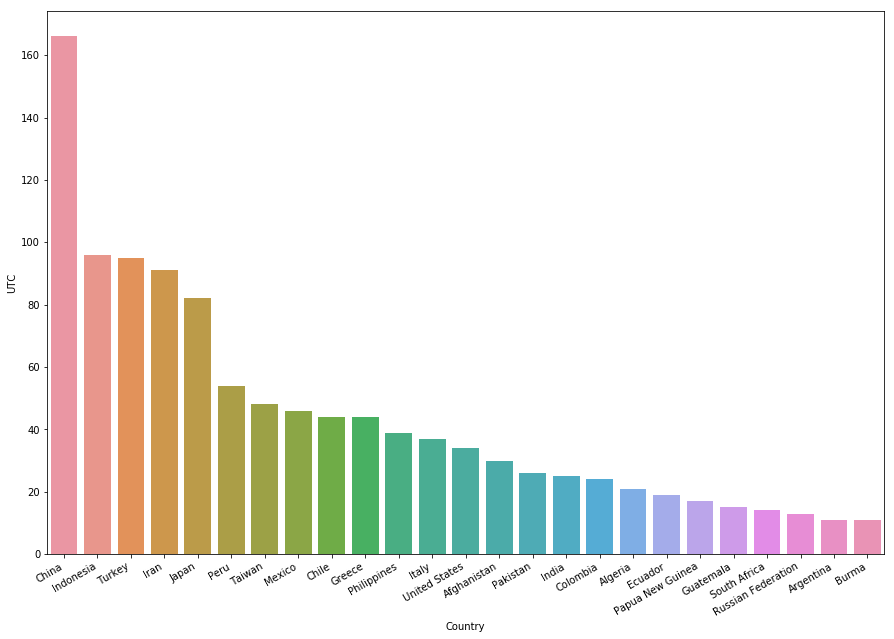

In [32]:
quakes_country = quakes_country.reset_index()
#quakes_country
quakes_country_25 = quakes_country.nlargest(25, columns = "UTC")
#quakes_country_25

f, ax = plt.subplots(figsize=(15, 10))
#plt.ylabel('Number of Quakes')
quake_count = sns.barplot(quakes_country_25.Country, quakes_country_25.UTC)
quake_count.set_xticklabels(quake_count.get_xticklabels(), rotation=30, ha="right")

In [31]:
country_list = quakes_country_25["Country"].tolist()
#country_list
earthquakes_25 = earthquakes[earthquakes["Country"].str.contains('|'.join(country_list))]
#earthquakes_25.info()

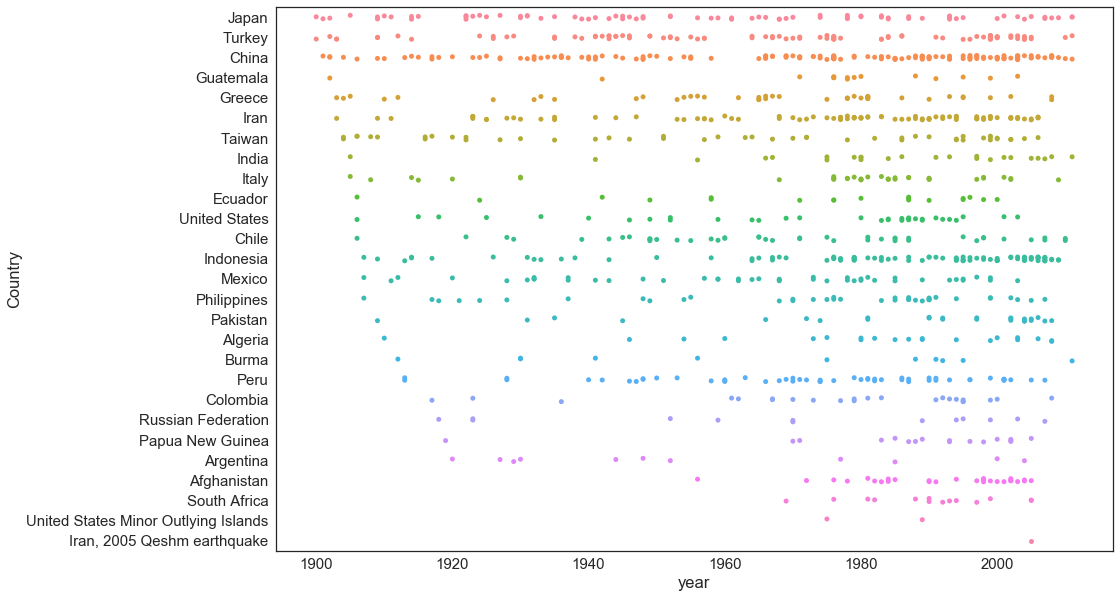

In [32]:
sns.set(font_scale = 1.5)
sns.set_style("white")
plt.subplots(figsize=(15,10))
sns.stripplot(x = "year", y = "Country", data = earthquakes_25, jitter=True)

(array([  1.08100000e+03,   8.00000000e+00,   4.00000000e+00,
          2.00000000e+00,   1.00000000e+00,   1.00000000e+00,
          4.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   1.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   1.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   1.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
        

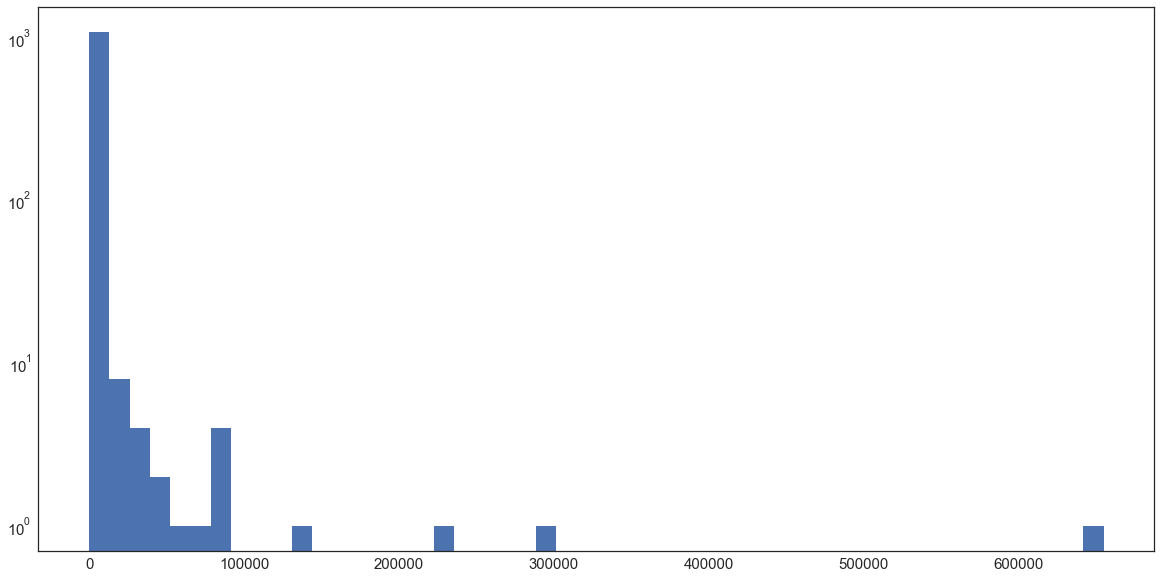

In [33]:
plt.figure(figsize=(20,10))
plt.yscale('log', nonposy='clip')
plt.hist(earthquakes_25["Max_Deaths"], bins = 50)

(array([ 181.,    0.,    4.,    0.,    0.,    0.,    0.,    0.,    0.,
           2.,    0.,    0.,   15.,    2.,    7.,   20.,    5.,   66.,
           4.,    5.,    4.,    6.,   16.,    8.,   10.,    7.,    6.,
          14.,   13.,   22.,    6.,   12.,    5.,    5.,   15.,    6.,
          11.,    5.,   33.,    8.,   37.,   10.,   15.,    8.,   11.,
          10.,    7.,    5.,   15.,    9.,    9.,   19.,    4.,   15.,
         121.,    7.,   26.,   10.,    6.,   12.,   10.,   11.,    9.,
          10.,   10.,    7.,   10.,    4.,    5.,    7.,   82.,    7.,
          14.,    6.,    8.,    9.,    7.,    4.,   10.,   16.,   11.,
          12.,    7.,    4.,    8.,    7.,   21.,   13.,   17.,    6.,
          11.,   20.,    6.,   21.,   16.,   11.,   11.,    4.,    4.,    5.]),
 array([  -1.  ,    3.33,    7.66,   11.99,   16.32,   20.65,   24.98,
          29.31,   33.64,   37.97,   42.3 ,   46.63,   50.96,   55.29,
          59.62,   63.95,   68.28,   72.61,   76.94,   81.27,   85.6

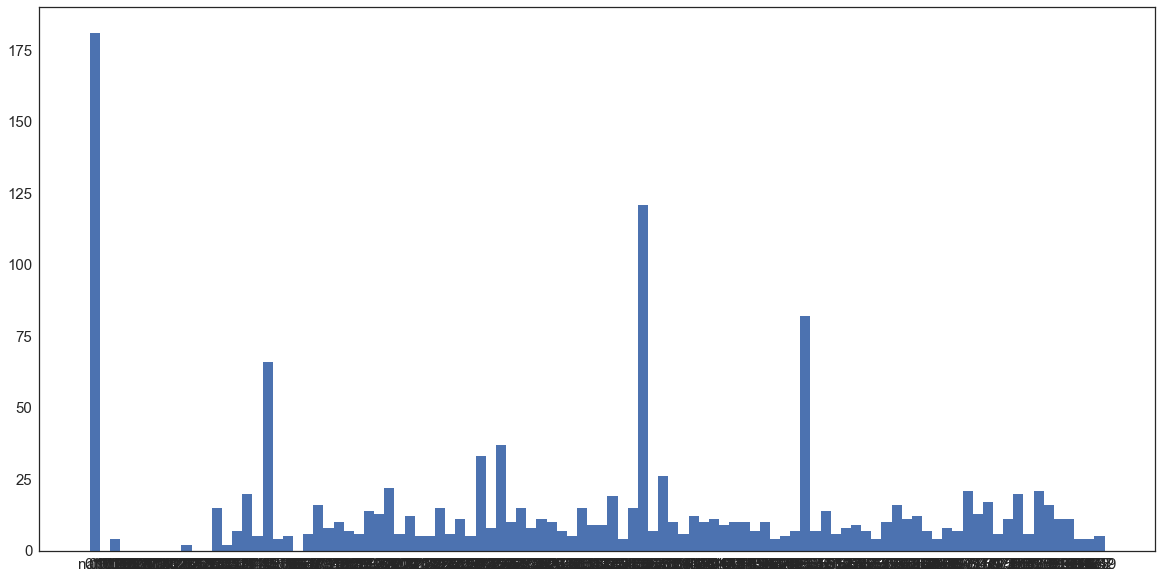

In [34]:
plt.figure(figsize=(20,10))
plt.hist(earthquakes["Depth_km"], bins = 100)

In [35]:
earthquakes_cont = earthquakes[["Depth_km", "Mag", "Max_Deaths", "year"]]

In [36]:
earthquakes_cont.iloc[413]

Depth_km         ?
Mag            6.1
Max_Deaths    1100
year          1963
Name: 413, dtype: object

In [37]:
earthquakes_cont = earthquakes_cont.replace("?", np.nan)

In [38]:
earthquakes_cont["Depth_km"] = pd.to_numeric(earthquakes_cont["Depth_km"])

In [39]:
earthquakes_cont.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1340 entries, 0 to 1339
Data columns (total 4 columns):
Depth_km      1249 non-null float64
Mag           1340 non-null float64
Max_Deaths    1340 non-null float64
year          1340 non-null int64
dtypes: float64(3), int64(1)
memory usage: 42.0 KB


In [40]:
earthquakes_cont = earthquakes_cont.fillna(0)

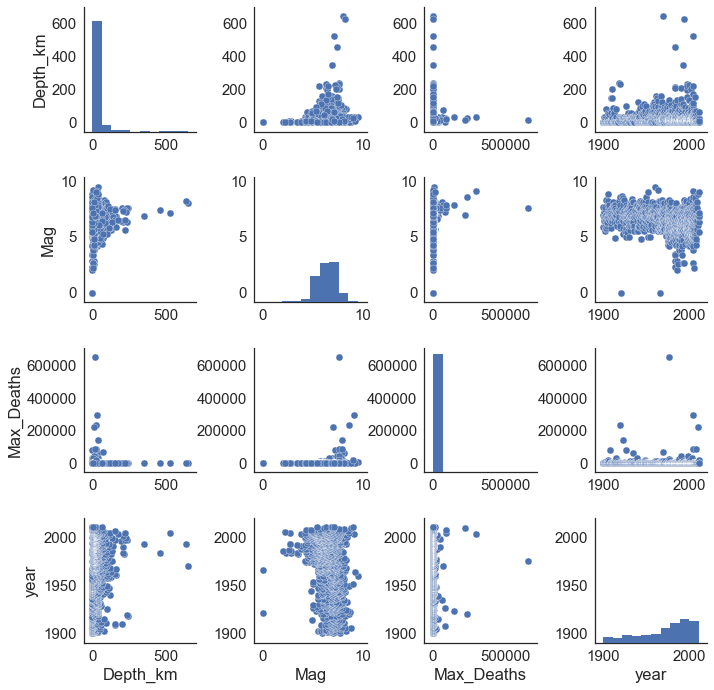

In [41]:
sns.pairplot(earthquakes_cont, dropna = True)

In [42]:
request = urllib.request.Request("http://volcano.oregonstate.edu/volcano_table")
result = urllib.request.urlopen(request)
resulttext = result.read()
soup_v = BS(resulttext, 'html.parser')
type(soup_v)

bs4.BeautifulSoup

In [43]:
table_v = soup_v.find_all('table', class_="views-table cols-6")
#table_v
#type(table_v)
#len(table_v)

In [44]:
table_v2 = table_v[0]
#type(table_v2)
table_headers_v = table_v2.find_all("th")
columns_v = [th.text for th in table_headers_v]
columns_v

['\n          Volcano Name        ',
 '\n          Country        ',
 '\n          Type        ',
 '\n          Latitude (dd)        ',
 '\n          Longitude (dd)        ',
 '\n          Elevation (m)        ']

In [45]:
rows_v = []
for tr in table_v2.find_all("tr")[1:]:
    row_data = [td.text for td in tr.find_all("td")]
    rows_v.append(row_data)
    
rows_v

[['\nAbu ',
  '\n            Japan          ',
  '\n            Shield          ',
  '\n            34.50          ',
  '\n            131.60          ',
  '\n            641          '],
 ['\nAcamarachi ',
  '\n            Chile          ',
  '\n            Stratovolcano          ',
  '\n            -23.30          ',
  '\n            -67.62          ',
  '\n            6046          '],
 ['\nAcatenango ',
  '\n            Guatemala          ',
  '\n            Stratovolcano          ',
  '\n            14.50          ',
  '\n            -90.88          ',
  '\n            3976          '],
 ['\nAcigöl-Nevsehir ',
  '\n            Turkey          ',
  '\n            Caldera          ',
  '\n            38.57          ',
  '\n            34.52          ',
  '\n            1689          '],
 ['\nAdams ',
  '\n            USA          ',
  '\n            Stratovolcano          ',
  '\n            46.21          ',
  '\n            -121.49          ',
  '\n            3742          '],
 [

In [46]:
volcanoes = pd.DataFrame(rows_v, columns = columns_v)
volcanoes.columns = ["Name", "Country", "Type", "lat", "lng", "Elevation"]
test_v = "(\n|\n\s)"
volcanoes = volcanoes.replace(to_replace = test_v, value = "", regex = True)
volcanoes["lat"] = volcanoes["lat"].str.strip()
volcanoes["lng"] = volcanoes["lng"].str.strip()
volcanoes["Elevation"] = volcanoes["Elevation"].str.strip()

In [47]:
volcanoes.head()

,Name,Country,Type,lat,lng,Elevation
0,Abu,Japan,Shield,34.50,131.60,641
1,Acamarachi,Chile,Stratovolcano,-23.30,-67.62,6046
2,Acatenango,Guatemala,Stratovolcano,14.50,-90.88,3976
3,Acigöl-Nevsehir,Turkey,Caldera,38.57,34.52,1689
4,Adams,USA,Stratovolcano,46.21,-121.49,3742


In [48]:
volcanoes["lat"] = pd.to_numeric(volcanoes["lat"])
volcanoes["lng"] = pd.to_numeric(volcanoes["lng"])
volcanoes["Elevation"] = pd.to_numeric(volcanoes["Elevation"])
volcanoes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 431 entries, 0 to 430
Data columns (total 6 columns):
Name         431 non-null object
Country      431 non-null object
Type         431 non-null object
lat          427 non-null float64
lng          427 non-null float64
Elevation    429 non-null float64
dtypes: float64(3), object(3)
memory usage: 20.3+ KB


In [49]:
geometry = [Point(xy) for xy in zip(volcanoes.lng, volcanoes.lat)]
crs = {"init": "epsg:4326"} 
volcanoes_gdf = gpd.GeoDataFrame(volcanoes, crs=crs, geometry=geometry)

In [50]:
volcanoes_gdf.head()

,Name,Country,Type,lat,lng,Elevation,geometry
0,Abu,Japan,Shield,34.50,131.60,641.0,POINT (131.6 34.5)
1,Acamarachi,Chile,Stratovolcano,-23.30,-67.62,6046.0,POINT (-67.62 -23.3)
2,Acatenango,Guatemala,Stratovolcano,14.50,-90.88,3976.0,POINT (-90.88 14.5)
3,Acigöl-Nevsehir,Turkey,Caldera,38.57,34.52,1689.0,POINT (34.52 38.57)
4,Adams,USA,Stratovolcano,46.21,-121.49,3742.0,POINT (-121.49 46.21)


In [51]:
plates_gdf = gpd.read_file("MR_Data/PB2002_plates.json")
plates_gdf["geometry"].crs

{'init': 'epsg:4326'}

In [52]:
countries_gdf = gpd.read_file("MR_Data/countries.geojson")
countries_gdf["geometry"].crs

{'init': 'epsg:4326'}

In [53]:
earthquakes = earthquakes.replace("?", np.nan)
earthquakes = earthquakes.replace("??", np.nan)
earthquakes["Lat"] = pd.to_numeric(earthquakes["Lat"])
earthquakes["Long"] = pd.to_numeric(earthquakes["Long"])
earthquakes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1340 entries, 0 to 1339
Data columns (total 14 columns):
UTC                   1340 non-null datetime64[ns]
Country               1340 non-null object
Lat                   1325 non-null float64
Long                  1325 non-null float64
Depth_km              1249 non-null object
Mag                   1340 non-null float64
Secondary_Effects     373 non-null object
PDE_Shaking_Deaths    1340 non-null float64
PDE_Deaths            1340 non-null float64
Utsu_Deaths           1340 non-null float64
EM-DAT_Deahts         1340 non-null float64
Other_Deaths          37 non-null float64
Max_Deaths            1340 non-null float64
year                  1340 non-null int64
dtypes: datetime64[ns](1), float64(9), int64(1), object(3)
memory usage: 146.6+ KB


In [54]:
earthquakes_2000 = earthquakes[earthquakes["year"]<=2000]
earthquakes_2000 = earthquakes_2000.drop(["Depth_km", "Secondary_Effects", "PDE_Shaking_Deaths", "PDE_Deaths", "Utsu_Deaths", "EM-DAT_Deahts", "Other_Deaths", "year"], axis = 1)
earthquakes_2000.columns = ["Date", "Country", "Lat", "Long", "Magnitude", "Deaths"]

In [55]:
request = urllib.request.Request("https://en.wikipedia.org/wiki/List_of_21st-century_earthquakes")
result = urllib.request.urlopen(request)
resulttext = result.read()
soup_2 = BS(resulttext, 'html.parser')
type(soup_2)

bs4.BeautifulSoup

In [56]:
table_e = soup_2.find_all('table', class_="wikitable sortable")
#table_e
#type(table_e)
len(table_e)

17

In [57]:
earthquakes_recent = []
for table in table_e:
    table_headers_e = table.find_all("th")
    columns_e = [th.text for th in table_headers_e]
#    print(columns_e)
    rows_e = []
    for tr in table.find_all("tr")[1:]:
        row_data = [td.text for td in tr.find_all("td")]
        rows_e.append(row_data)
#    print(rows_e)
    earthquakes_years = pd.DataFrame(rows_e, columns = columns_e)
#earthquakes_years
    earthquakes_recent.append(earthquakes_years)
    earthquakes_new = pd.concat(earthquakes_recent)
#earthquakes_recent
earthquakes_new = earthquakes_new [["Date", "Time (UTC)", "Place", "Lat.", "Long.", "Fatalities", "Magnitude", "Comments"]]
earthquakes_new = earthquakes_new.reset_index(drop=True)

In [58]:
earthquakes_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Data columns (total 8 columns):
Date          583 non-null object
Time (UTC)    583 non-null object
Place         583 non-null object
Lat.          583 non-null object
Long.         583 non-null object
Fatalities    583 non-null object
Magnitude     571 non-null object
Comments      565 non-null object
dtypes: object(8)
memory usage: 36.5+ KB


In [59]:
cols = ["Lat.", "Long.", "Fatalities", "Magnitude"]
earthquakes_new[cols] = earthquakes_new[cols].apply(pd.to_numeric, errors='coerce')
#earthquakes_new.iloc[275]
earthquakes_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Data columns (total 8 columns):
Date          583 non-null object
Time (UTC)    583 non-null object
Place         583 non-null object
Lat.          583 non-null float64
Long.         570 non-null float64
Fatalities    533 non-null float64
Magnitude     552 non-null float64
Comments      565 non-null object
dtypes: float64(4), object(4)
memory usage: 36.5+ KB


In [60]:
earthquakes_new.columns = ["Date", "Time", "Country", "Lat", "Long", "Deaths", "Magnitude", "Comments"]
earthquakes_new = earthquakes_new.drop(["Time", "Comments"], axis = 1)
earthquakes_new = earthquakes_new[["Date", "Country", "Lat", "Long", "Magnitude", "Deaths"]]

In [61]:
earthquakes_new_rearrange = earthquakes_new[earthquakes_new["Lat"]>90]
earthquakes_new_rearrange.columns = ["Date", "Lat", "Long", "Deaths", "Magnitude", "Country"]
earthquakes_new_rearrange = earthquakes_new_rearrange[["Date", "Country", "Lat", "Long", "Deaths", "Magnitude"]]
#earthquakes_new_rearrange
rearrange_list = earthquakes_new_rearrange.index.tolist()
#rearrange_list
earthquakes_new_rearrange

,Date,Country,Lat,Long,Deaths,Magnitude
94,"September 25, 2003",NaN,41.774,143.593,7.4,NaN
111,"February 7, 2004",NaN,-4.003,135.023,7.3,NaN
219,23:49,7.9,-2.506,100.906,0.0,NaN
220,"September 13, 2007",NaN,-2.130,99.627,7.0,NaN
258,"August 5, 2008",6.0,32.756,105.494,4.0,NaN
261,"August 31, 2008",5.6,26.232,101.970,2.0,NaN
297,"October 1, 2009",6.6,-2.508,101.484,3.0,NaN
369,"September 3, 2011",7.0,-20.585,169.696,0.0,NaN
421,"February 8, 2013",7.1,-10.932,166.021,0.0,NaN
456,"April 13, 2014",NaN,-11.451,162.069,7.4,NaN


In [62]:
earthquakes_new = earthquakes_new.drop(rearrange_list, axis = 0)
earthquakes_new = pd.concat([earthquakes_new, earthquakes_new_rearrange])
earthquakes_new["Lat"] = pd.to_numeric(earthquakes_new["Lat"])
#earthquakes_new[earthquakes_new["Lat."]>90]
#earthquakes_new
earthquakes_total = pd.concat([earthquakes_new, earthquakes_2000])
#earthquakes_total
earthquakes_total[earthquakes_total["Long"]==1.000]

,Country,Date,Deaths,Lat,Long,Magnitude
19,-17.543,"July 7, 2001",7.6,-72.077,1.0,NaN
283,42.275,"April 7, 2009",5.5,13.464,1.0,NaN


In [63]:
geometry2 = [Point(xy) for xy in zip(earthquakes_total.Long, earthquakes_total.Lat)]
crs = {"init": "epsg:4326"} 
earthquakes_gdf = gpd.GeoDataFrame(earthquakes_total, crs=crs, geometry=geometry2)

geometry = [Point(xy) for xy in zip(earthquakes_new["Long."], earthquakes_new["Lat."])]
crs = {"init": "epsg:4326"} 
earthquakes_new_gdf = gpd.GeoDataFrame(earthquakes_new, crs=crs, geometry=geometry)
earthquakes_new_gdf.head(1)

In [64]:
request = urllib.request.Request("http://vents-data.interridge.org/ventfields_list_all")
result = urllib.request.urlopen(request)
resulttext = result.read()
soup_vent = BS(resulttext, 'html.parser')
table_vent = soup_vent.find_all('table', class_="views-table cols-8")
#table_vent
#type(table_vent)
#len(table_vent)
table_vent2 = table_vent[0]
#type(table_vent2)
table_headers_vent = table_vent2.find_all("th")
columns_vent = [th.text for th in table_headers_vent]
columns_vent
rows_vent = []
for tr in table_vent2.find_all("tr")[1:]:
    row_data = [td.text for td in tr.find_all("td")]
    rows_vent.append(row_data)    
#rows_vent
vents = pd.DataFrame(rows_vent, columns = columns_vent)

In [65]:
vents.head(1)

,Vent Field Name ID,Activity,Tectonic Setting,Region,Latitude,Longitude,Maximum or Single Reported Depth,Year and How Discovered
0,\n13 N Ridge Site,"\nactive, confirmed",\nback-arc spreading center,\nMariana Trough,\n 13.0987,\n 143.6886,\n 2900,\n 2000 deep-tow camera


In [66]:
#test_v = "(\n|\n\s)"
vents = vents.replace(to_replace = test_v, value = "", regex = True)
vents.columns = ["Name", "Activity", "Tectonic Setting", "Region", "lat", "lng", "Depth", "Year&Discovered"]
vents["lat"] = vents["lat"].str.strip()
vents["lng"] = vents["lng"].str.strip()
vents["Year&Discovered"] = vents["Year&Discovered"].str.strip()
vents.head(1)

,Name,Activity,Tectonic Setting,Region,lat,lng,Depth,Year&Discovered
0,13 N Ridge Site,"active, confirmed",back-arc spreading center,Mariana Trough,13.0987,143.6886,2900,2000 deep-tow camera


In [67]:
cols = ["lat", "lng", "Depth"]
vents[cols] = vents[cols].apply(pd.to_numeric)#, errors='coerce')
#earthquakes_new.iloc[275]
vents.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 698 entries, 0 to 697
Data columns (total 8 columns):
Name                698 non-null object
Activity            698 non-null object
Tectonic Setting    698 non-null object
Region              698 non-null object
lat                 698 non-null float64
lng                 698 non-null float64
Depth               696 non-null float64
Year&Discovered     698 non-null object
dtypes: float64(3), object(5)
memory usage: 43.7+ KB


In [68]:
geometry_vent = [Point(xy) for xy in zip(vents.lng, vents.lat)]
crs = {"init": "epsg:4326"} 
vents_gdf = gpd.GeoDataFrame(vents, crs=crs, geometry=geometry_vent)

In [69]:
vents_gdf.head(1)

,Name,Activity,Tectonic Setting,Region,lat,lng,Depth,Year&Discovered,geometry
0,13 N Ridge Site,"active, confirmed",back-arc spreading center,Mariana Trough,13.0987,143.6886,2900.0,2000 deep-tow camera,POINT (143.6886 13.0987)


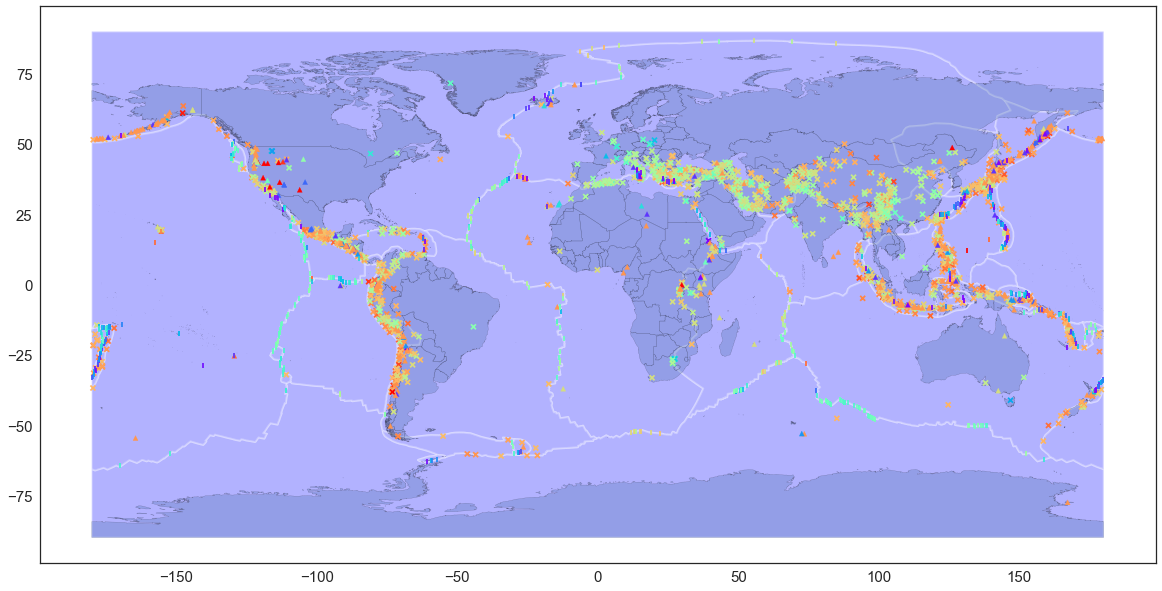

In [77]:
fig, ax = plt.subplots(figsize = (20, 20))
ax.set_aspect('equal')
plates_gdf.plot(ax=ax, color='blue', edgecolor='white', alpha = 0.3, lw = 2.0)
countries_gdf.plot(ax=ax, edgecolor='black', alpha = 0.3)
earthquakes_gdf.plot(ax=ax, markersize = 25, column = "Magnitude", cmap = "rainbow", marker = "x")
volcanoes_gdf.plot(ax=ax, markersize = 25, column = "Type", cmap = "rainbow", marker = "^")
#earthquakes_new_gdf.plot(ax=ax, markersize = 5, color = "blue")
vents_gdf.plot(ax=ax, markersize = 25, column = "Depth", cmap = "rainbow", marker = "|")

#fig2 = plt.figure()
#ax2 = fig2.add_subplot(111, sharex=ax)
#norm = mpl.colors.Normalize(vmin=earthquakes_gdf["Magnitude"].min(), vmax=earthquakes_gdf["Magnitude"].max())
#cb = mpl.colorbar.ColorbarBase(ax2, cmap="rainbow", norm=norm, orientation='horizontal')
#cb.set_label('Magnitude')

import matplotlib as mpl

fig, ax = plt.subplots()

cmap = "rainbow"

norm = mpl.colors.Normalize(vmin=earthquakes_gdf["Magnitude"].min(), vmax=earthquakes_gdf["Magnitude"].max())
cb = mpl.colorbar.ColorbarBase(ax, cmap=cmap, norm=norm,orientation='horizontal')
cb.set_label('Magnitude')

In [78]:
import fiona; fiona.supported_drivers

{'ARCGEN': 'r',
 'AeronavFAA': 'r',
 'BNA': 'raw',
 'DGN': 'raw',
 'DXF': 'raw',
 'ESRI Shapefile': 'raw',
 'GPKG': 'rw',
 'GPSTrackMaker': 'raw',
 'GPX': 'raw',
 'GeoJSON': 'rw',
 'Idrisi': 'r',
 'MapInfo File': 'raw',
 'OpenFileGDB': 'r',
 'PCIDSK': 'r',
 'SEGY': 'r',
 'SUA': 'r'}

In [80]:
vents_gdf.to_file(filename = "vents.GeoJSON", driver = "GeoJSON")

In [82]:
earthquakes_gdf.to_file(filename = "earthquakes.GeoJSON", driver = "GeoJSON")
volcanoes_gdf.to_file(filename = "volcanoes.GeoJSON", driver = "GeoJSON")